# Análise de dados de criptomoedas

- O objetivo da análise é encontrar padrões, tendências de crescimento ou queda e retirar insights por meio de gráficos e tratamento de dados para fins de investimento em criptomoedas.
- Serão utilizadas métricas como média móvel em cima dos valores de fechamento e o múltiplo de Mayer para análise específica do Bitcoin.

- Lista de moedas a serem analisadas:

**Bitcoin,
Ethereum,
Solana,
Xrp,
Polkadot,
Aave,
Litecoin,
Chainlink,
Avax**

- Importando as bibliotecas necessárias e conectando com a API

In [4]:
# Importações externas
import ccxt
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

# Importações internas
from src.preprocessing import *
from src.plotting import *

- Constantes e configurações iniciais

In [5]:
# Conectando com a API da Binance
BINANCE_API = ccxt.binance()

# Lista de moedas que serão analisadas
COINS = [
    "BTC/USDT",  # Bitcoin
    "ETH/USDT",  # Ethereum
    "SOL/USDT",  # Solana
    "XRP/USDT",  # XRP
    "DOT/USDT",  # Polkadot
    "AAVE/USDT",  # Aave
    "LTC/USDT",  # Litecoin
    "LINK/USDT",  # Chainlink
    "AVAX/USDT"   # Avalanche
]

- Gerando um dataframe com todas as criptomoedas necessárias

In [6]:
# Dataframe vazio para armazenar todas as moedas
df = pd.DataFrame()
# Armazenando os dados de todas as moedas em um dataframe geral
df = generate_coins_data(df, COINS)
# Verificando se há dados faltando
df.isna().sum()
# Exibindo o dataframe geral
df

,data,moeda,close
0,2023-04-25,BTC/USDT,28300.79
1,2023-04-26,BTC/USDT,28415.29
2,2023-04-27,BTC/USDT,29472.77
3,2023-04-28,BTC/USDT,29311.70
4,2023-04-29,BTC/USDT,29230.45
...,...,...,...
6295,2025-03-20,AVAX/USDT,18.74
6296,2025-03-21,AVAX/USDT,19.18
6297,2025-03-22,AVAX/USDT,19.43
6298,2025-03-23,AVAX/USDT,19.82


- Gerando dataframes específicos, divididos em 3 grupos (Bitcoin, Ethereum e moedas restantes)

In [7]:
# Criando o dataframe de bitcoin
bitcoin_df = df[df["moeda"] == "BTC/USDT"]
# Criando o dataframe de Ethereum
ethereum_df = df[df["moeda"] == "ETH/USDT"]
# Criando o dataframe das outras moedas
other_coins_df = df[~df["moeda"].isin(["BTC/USDT", "ETH/USDT"])]
# Exibindo o dataframe de bitcoin
bitcoin_df

,data,moeda,close
0,2023-04-25,BTC/USDT,28300.79
1,2023-04-26,BTC/USDT,28415.29
2,2023-04-27,BTC/USDT,29472.77
3,2023-04-28,BTC/USDT,29311.70
4,2023-04-29,BTC/USDT,29230.45
...,...,...,...
695,2025-03-20,BTC/USDT,84223.39
696,2025-03-21,BTC/USDT,84088.79
697,2025-03-22,BTC/USDT,83840.59
698,2025-03-23,BTC/USDT,86082.50


- Adicionando a coluna de média móvel dos últimos 200 dias nos dataframes

In [8]:
# Adicionando a média móvel nos DataFrames
bitcoin_df = moving_average_calc(bitcoin_df)
ethereum_df = moving_average_calc(ethereum_df)
other_coins_df = moving_average_calc(other_coins_df)

# Removendo as linhas onde a média móvel está sem valor
bitcoin_df = bitcoin_df.dropna()
ethereum_df = ethereum_df.dropna()
other_coins_df = other_coins_df.dropna()

- Adicionando o Múltiplo de Mayer ao dataframe de Bitcoin

In [9]:
# Inserindo a uma coluna com o valor do Múltiplo de Mayer no dataframe do Bitcoin
bitcoin_df = mayer_multiple(bitcoin_df)
bitcoin_df

,data,moeda,close,media_movel_200,multiplo_de_mayer
199,2023-11-10,BTC/USDT,37301.63,28604.50190,1.304048
200,2023-11-11,BTC/USDT,37130.00,28648.64795,1.296047
201,2023-11-12,BTC/USDT,37064.13,28691.89215,1.291798
202,2023-11-13,BTC/USDT,36462.93,28726.84295,1.269298
203,2023-11-14,BTC/USDT,35551.19,28758.04040,1.236217
...,...,...,...,...,...
695,2025-03-20,BTC/USDT,84223.39,84506.50100,0.996650
696,2025-03-21,BTC/USDT,84088.79,84631.28430,0.993590
697,2025-03-22,BTC/USDT,83840.59,84763.04860,0.989117
698,2025-03-23,BTC/USDT,86082.50,84903.60660,1.013885


- Salvando os dados em um arquivo CSV para análises futuras

In [10]:
# Gerando os arquivos CSV dos 3 dataframes
bitcoin_df.to_csv(r"coins_data\bitcoin_data.csv", index=False) # Salvando os dados do bitcoin
ethereum_df.to_csv(r"coins_data\ethereum_data.csv", index=False)
other_coins_df.to_csv(r"coins_data\other_coins_data.csv", index=False)

- Visualização dos dados do Bitcoin

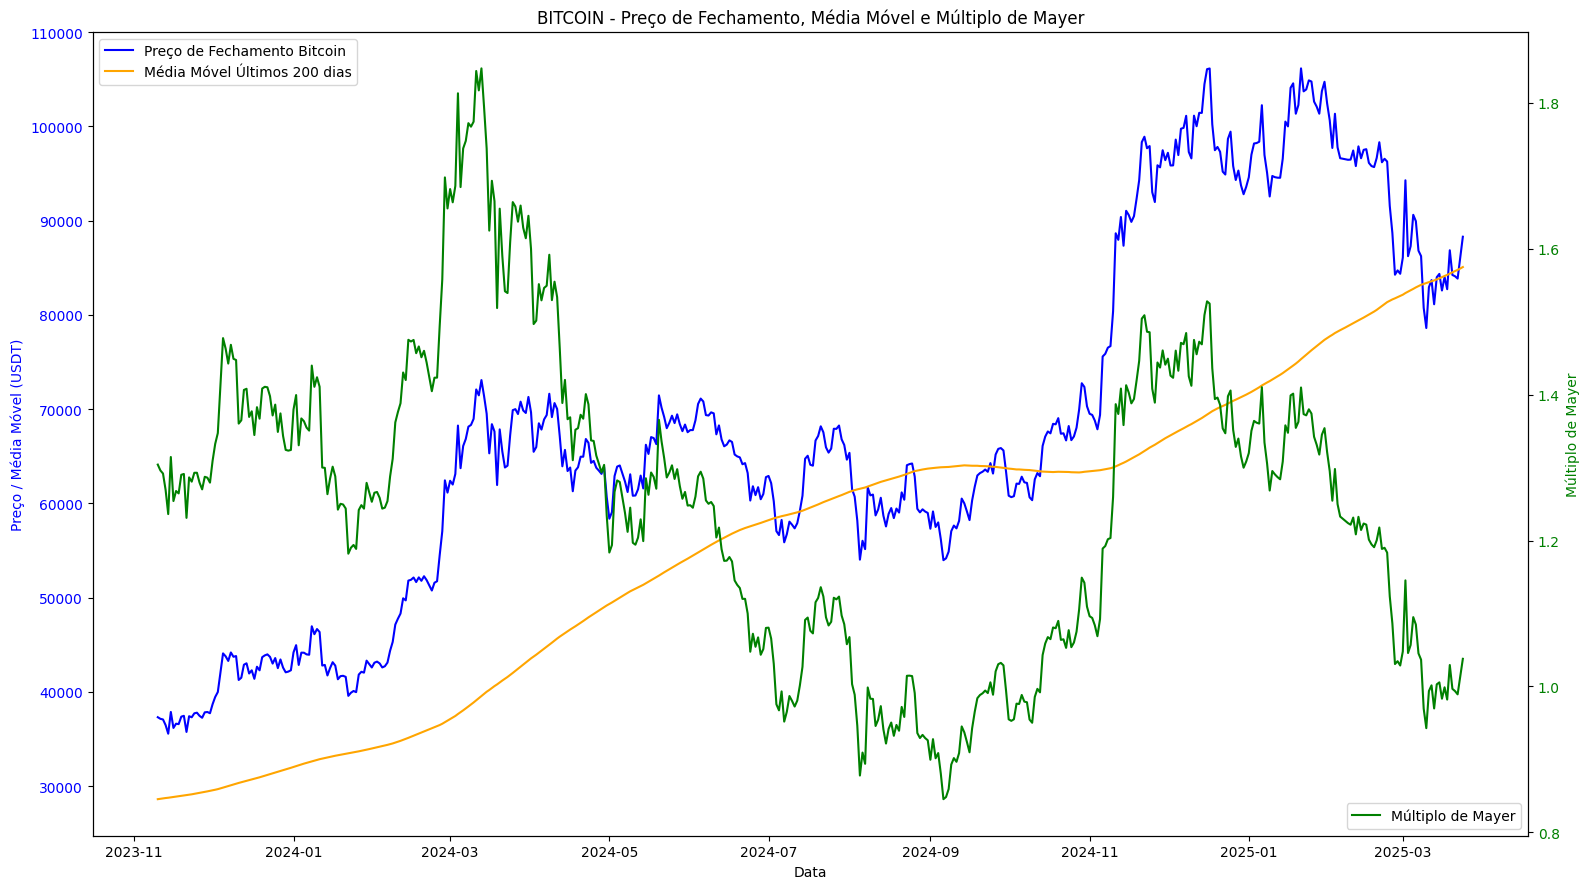

In [11]:
plot_btc(bitcoin_df)

- Visualização de dados do Ethereum

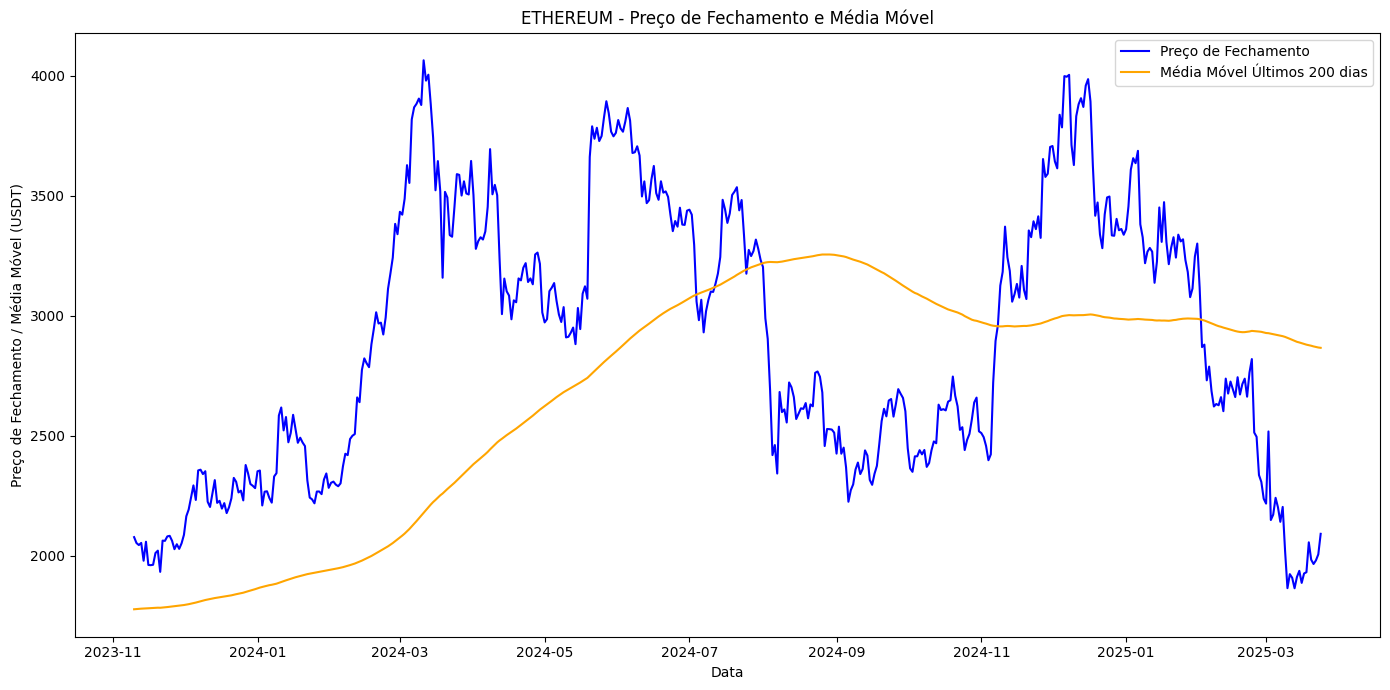

In [12]:
plot_eth(ethereum_df)


- Visualização de dados das moedas restantes: Solana, Xrp, Polkadot, Aave, Litecoin, Chainlink, Avax

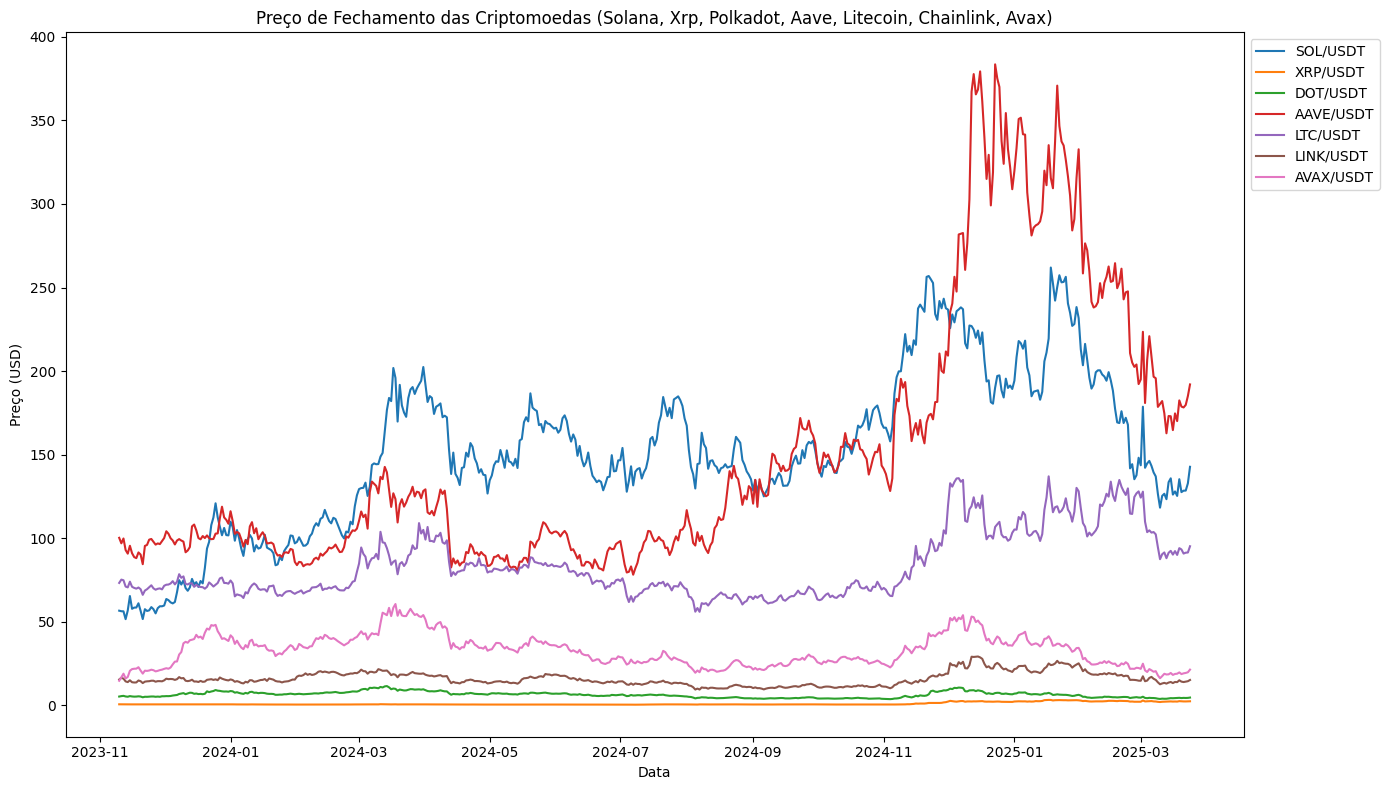

In [13]:
# Gerando o gráfico para o preço de fechamento de todas as moedas
plot_closing_prices(other_coins_df)

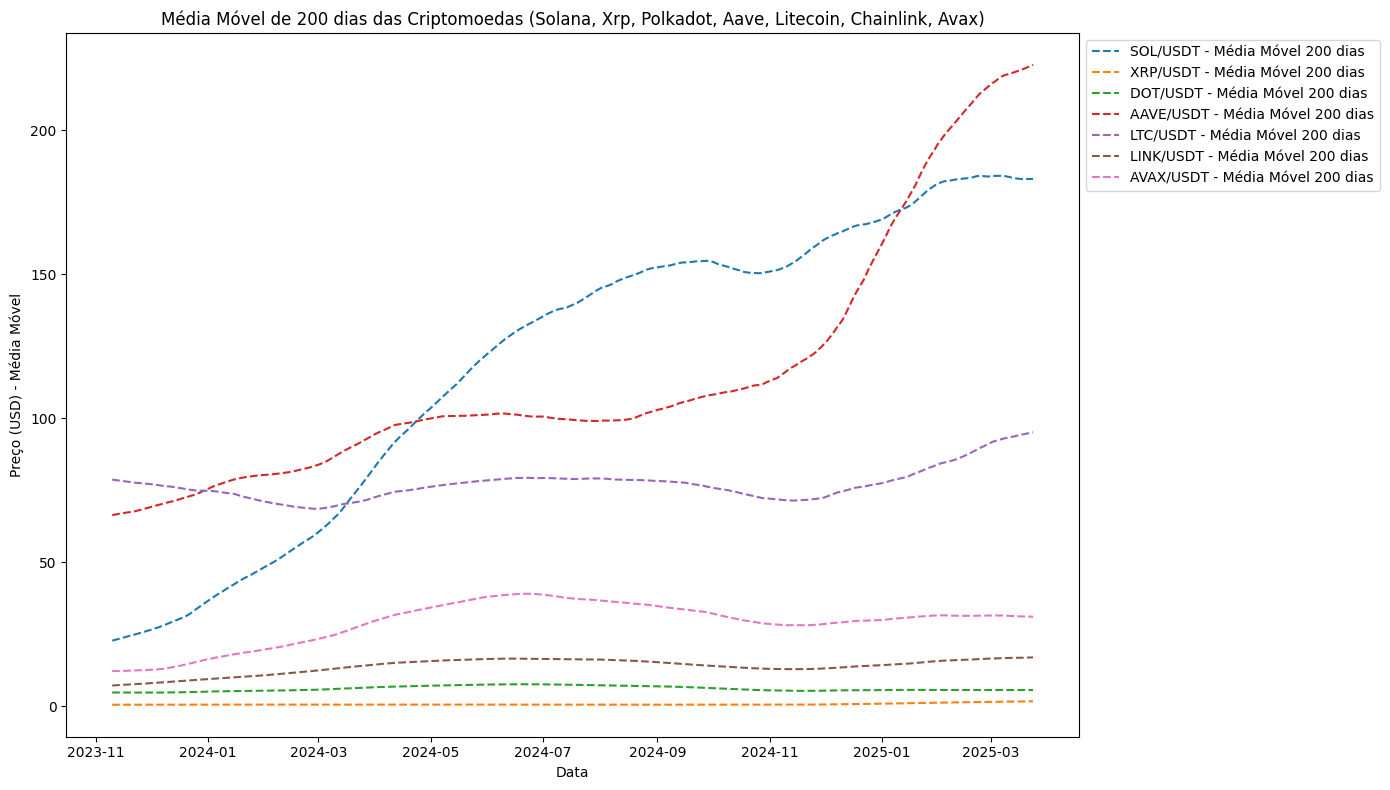

In [14]:
# Gerando o gráfico para a média móvel de 200 dias de todas as moedas
plot_moving_averages(other_coins_df)
